# 📓 Повторение: Глава 2.1-2.2 - Системы уравнений и Матрицы

## 🎯 Цель этого notebook

После небольшого перерыва в учёбе важно освежить в памяти пройденный материал перед тем, как двигаться дальше. Этот notebook - **краткое повторение** ключевых концепций из разделов 2.1 и 2.2, которые вы уже изучили.

**Что мы вспомним:**
- Системы линейных уравнений и их геометрический смысл (2.1)
- Матрицы и основные операции (2.2)
- Связь между ними

**Формат:** Быстрое напоминание теории + небольшая практика

---

## 📐 Раздел 2.1: Системы линейных уравнений

### Ключевая идея

Система линейных уравнений - это набор уравнений вида:

$$
\begin{aligned}
a_{11}x_1 + a_{12}x_2 + \ldots + a_{1n}x_n &= b_1 \\
a_{21}x_1 + a_{22}x_2 + \ldots + a_{2n}x_n &= b_2 \\
&\vdots \\
a_{m1}x_1 + a_{m2}x_2 + \ldots + a_{mn}x_n &= b_m
\end{aligned}
$$

**Геометрический смысл (2D):**
- Каждое уравнение = прямая на плоскости
- Решение = точка пересечения прямых

### 💡 Быстрый пример (из Example 2.1)

Вспомним производственную задачу:

$$
\begin{aligned}
x_1 + x_2 + x_3 &= 3 \quad \text{(продукт 1)} \\
x_1 - x_2 + x_3 &= 1 \quad \text{(продукт 2)}
\end{aligned}
$$

**Решение "на бумаге":**
1. Вычитаем второе из первого: $2x_2 = 2 \Rightarrow x_2 = 1$
2. Подставляем: $x_1 + 1 + x_3 = 3 \Rightarrow x_1 + x_3 = 2$
3. Параметрическое решение: $x_3 = \lambda, \; x_1 = 2 - \lambda, \; x_2 = 1$

### 📊 Визуализация: Геометрическая интерпретация

Простой пример системы 2×2:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Настройки для красивых графиков
plt.rcParams['figure.figsize'] = (10, 8)
plt.rcParams['font.size'] = 11

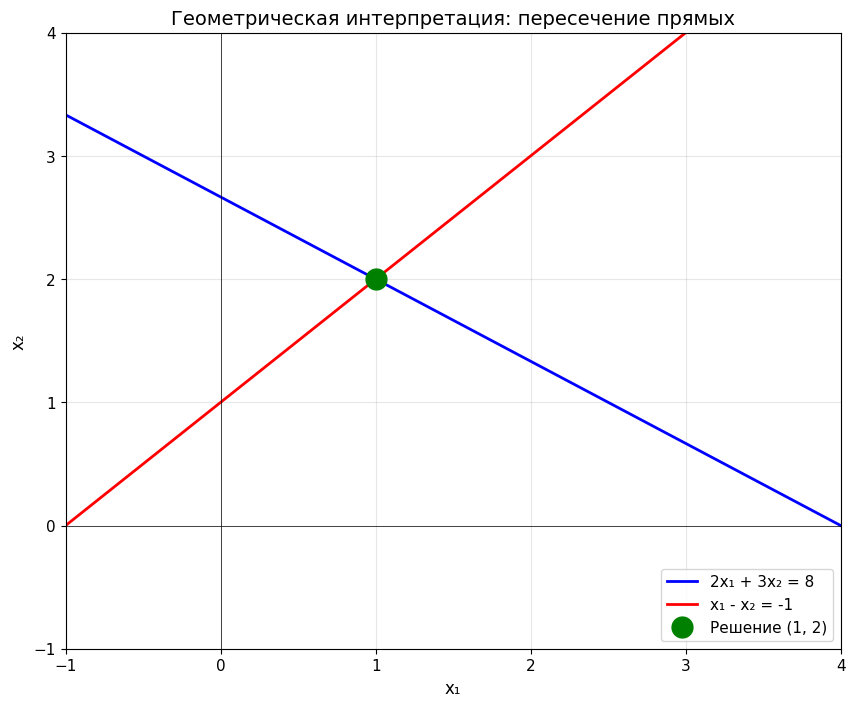

✅ Решение: x₁ = 1, x₂ = 2
Проверка: 2·1 + 3·2 = 8 ✓
Проверка: 1 - 2 = -1 ✓


In [2]:
# Система:
# 2x₁ + 3x₂ = 8
# x₁ - x₂ = -1

# Преобразуем в форму x₂ = f(x₁)
x1 = np.linspace(-2, 5, 100)
x2_eq1 = (8 - 2*x1) / 3  # из первого уравнения
x2_eq2 = x1 + 1          # из второго уравнения

plt.figure(figsize=(10, 8))
plt.plot(x1, x2_eq1, 'b-', label='2x₁ + 3x₂ = 8', linewidth=2)
plt.plot(x1, x2_eq2, 'r-', label='x₁ - x₂ = -1', linewidth=2)

# Решение (пересечение)
solution = np.array([1, 2])  # можно проверить подстановкой
plt.plot(solution[0], solution[1], 'go', markersize=15, label='Решение (1, 2)')

plt.grid(True, alpha=0.3)
plt.xlabel('x₁', fontsize=12)
plt.ylabel('x₂', fontsize=12)
plt.title('Геометрическая интерпретация: пересечение прямых', fontsize=14)
plt.legend(fontsize=11)
plt.axhline(y=0, color='k', linewidth=0.5)
plt.axvline(x=0, color='k', linewidth=0.5)
plt.xlim(-1, 4)
plt.ylim(-1, 4)
plt.show()

print(f"✅ Решение: x₁ = {solution[0]}, x₂ = {solution[1]}")
print(f"Проверка: 2·{solution[0]} + 3·{solution[1]} = {2*solution[0] + 3*solution[1]} ✓")
print(f"Проверка: {solution[0]} - {solution[1]} = {solution[0] - solution[1]} ✓")

**Что мы видим:**
- 🔵 Синяя прямая - первое уравнение
- 🔴 Красная прямая - второе уравнение
- 🟢 Зелёная точка - **решение** (точка пересечения)

---

## 📐 Раздел 2.2: Матрицы

### Ключевая идея

**Definition 2.1 (Matrix):**

Матрица $A \in \mathbb{R}^{m \times n}$ - это прямоугольная таблица чисел:

$$
A = \begin{bmatrix}
a_{11} & a_{12} & \cdots & a_{1n} \\
a_{21} & a_{22} & \cdots & a_{2n} \\
\vdots & \vdots & \ddots & \vdots \\
a_{m1} & a_{m2} & \cdots & a_{mn}
\end{bmatrix}
$$

- $m$ строк, $n$ столбцов
- $(m, n)$ - размерность матрицы
- $a_{ij}$ - элемент на позиции $(i, j)$

### 🔗 Связь с системами уравнений

Система:
$$
\begin{aligned}
2x_1 + 3x_2 &= 8 \\
x_1 - x_2 &= -1
\end{aligned}
$$

Можно записать как $Ax = b$, где:

$$
A = \begin{bmatrix} 2 & 3 \\ 1 & -1 \end{bmatrix}, \quad
x = \begin{bmatrix} x_1 \\ x_2 \end{bmatrix}, \quad
b = \begin{bmatrix} 8 \\ -1 \end{bmatrix}
$$

**Это и есть главная идея:** Матрицы - это компактная запись систем уравнений!

### 💻 Основные операции с матрицами (краткое напоминание)

In [3]:
# 1. Создание матриц
A = np.array([[2, 3],
              [1, -1]])

b = np.array([8, -1])

print("Матрица A:")
print(A)
print(f"\nРазмерность A: {A.shape} (строки × столбцы)")
print(f"\nВектор b: {b}")

Матрица A:
[[ 2  3]
 [ 1 -1]]

Размерность A: (2, 2) (строки × столбцы)

Вектор b: [ 8 -1]


In [4]:
# 2. Сложение матриц (одинаковой размерности!)
B = np.array([[1, 0],
              [0, 2]])

C = A + B
print("A + B =")
print(C)
print("\n📝 Правило: складываем поэлементно")
print(f"Например: c₁₁ = a₁₁ + b₁₁ = {A[0,0]} + {B[0,0]} = {C[0,0]}")

A + B =
[[3 3]
 [1 1]]

📝 Правило: складываем поэлементно
Например: c₁₁ = a₁₁ + b₁₁ = 2 + 1 = 3


In [5]:
# 3. Умножение на скаляр
scalar = 2
D = scalar * A
print(f"{scalar} × A =")
print(D)
print("\n📝 Правило: каждый элемент умножается на скаляр")

2 × A =
[[ 4  6]
 [ 2 -2]]

📝 Правило: каждый элемент умножается на скаляр


In [6]:
# 4. Умножение матриц (самое важное!)
# A (2×2) × x (2×1) = b (2×1)

x_solution = np.array([1, 2])  # наше решение
result = A @ x_solution  # или np.dot(A, x_solution)

print("A × x =")
print(result)
print(f"\nДолжно быть равно b = {b}")
print(f"Проверка: {np.allclose(result, b)} ✅")

A × x =
[ 8 -1]

Должно быть равно b = [ 8 -1]
Проверка: True ✅


**Напоминание формулы умножения:**

Для $C = A \times B$:

$$
c_{ij} = \sum_{k=1}^{n} a_{ik} b_{kj}
$$

**Пример вручную:**

$$
\begin{bmatrix} 2 & 3 \\ 1 & -1 \end{bmatrix}
\begin{bmatrix} 1 \\ 2 \end{bmatrix}
=
\begin{bmatrix}
2 \cdot 1 + 3 \cdot 2 \\
1 \cdot 1 + (-1) \cdot 2
\end{bmatrix}
=
\begin{bmatrix} 8 \\ -1 \end{bmatrix}
$$

### ⚡ Специальные матрицы (быстрое напоминание)

In [7]:
# Единичная матрица I
I = np.eye(3)
print("Единичная матрица 3×3:")
print(I)
print("\n📝 Свойство: A × I = I × A = A")

# Нулевая матрица
Z = np.zeros((2, 3))
print("\nНулевая матрица 2×3:")
print(Z)

Единичная матрица 3×3:
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]

📝 Свойство: A × I = I × A = A

Нулевая матрица 2×3:
[[0. 0. 0.]
 [0. 0. 0.]]


---

## 🔄 Связываем всё вместе

### Главная идея Главы 2:

```
Система уравнений  ⟷  Матричная форма  ⟷  Векторная форма
    (словами)          (компактно)        (геометрия)
```

**Один и тот же объект:**

| Представление | Пример |
|---------------|--------|
| Система уравнений | $2x_1 + 3x_2 = 8$ <br> $x_1 - x_2 = -1$ |
| Матричная форма | $Ax = b$ |
| Конкретные матрицы | $A = \begin{bmatrix} 2 & 3 \\ 1 & -1 \end{bmatrix}$, $b = \begin{bmatrix} 8 \\ -1 \end{bmatrix}$ |
| Геометрия | Пересечение двух прямых |

---

## 🏋️ Быстрая практика

### Задача 1: Проверка понимания

Дана система:
$$
\begin{aligned}
3x_1 + 2x_2 &= 12 \\
x_1 + 4x_2 &= 14
\end{aligned}
$$

**Подзадачи:**
1. Запишите в матричной форме $Ax = b$
2. Решите в коде с помощью `np.linalg.solve()`
3. Проверьте решение подстановкой

In [9]:
# Ваше решение здесь

# 1. Определите A и b
A = np.array([[3, 2],
              [1, 4]])
b = np.array([12, 14])

# 2. Решите систему
x = np.linalg.solve(A, b)
verification = A @ x
# 3. Проверка
print(f"Решение: x₁ = {x[0]:.2f}, x₂ = {x[1]:.2f}")
print(f"Проверка A×x = {A @ x}")
print(f"Должно быть b = {b}")
print(f"Совпадает? {np.allclose(verification, b)} ✅")

Решение: x₁ = 2.00, x₂ = 3.00
Проверка A×x = [12. 14.]
Должно быть b = [12 14]
Совпадает? True ✅


<details>
<summary>💡 Подсказка (раскройте, если нужно)</summary>

```python
A = np.array([[3, 2],
              [1, 4]])
b = np.array([12, 14])

x = np.linalg.solve(A, b)

print(f"Решение: x₁ = {x[0]:.2f}, x₂ = {x[1]:.2f}")
verification = A @ x
print(f"Проверка A×x = {verification}")
print(f"Должно быть b = {b}")
print(f"Совпадает? {np.allclose(verification, b)} ✅")
```

Ответ: $x_1 = 2$, $x_2 = 3$
</details>

In [10]:
# Решение (раскомментируйте после попытки решить самостоятельно)

A = np.array([[3, 2],
              [1, 4]])
b = np.array([12, 14])

x = np.linalg.solve(A, b)

print(f"Решение: x₁ = {x[0]:.2f}, x₂ = {x[1]:.2f}")
verification = A @ x
print(f"Проверка A×x = {verification}")
print(f"Должно быть b = {b}")
print(f"Совпадает? {np.allclose(verification, b)} ✅")

Решение: x₁ = 2.00, x₂ = 3.00
Проверка A×x = [12. 14.]
Должно быть b = [12 14]
Совпадает? True ✅


---

### Задача 2: Умножение матриц

Вычислите вручную (на бумаге), а потом проверьте в коде:

$$
\begin{bmatrix} 1 & 2 \\ 3 & 4 \end{bmatrix}
\times
\begin{bmatrix} 5 & 6 \\ 7 & 8 \end{bmatrix}
= \; ?
$$

In [11]:
# Сначала посчитайте на бумаге! ✍️

# Потом проверьте:
A = np.array([[1, 2],
              [3, 4]])
B = np.array([[5, 6],
              [7, 8]])

C = A @ B
print("Результат:")
print(C)

Результат:
[[19 22]
 [43 50]]


<details>
<summary>💡 Решение на бумаге</summary>

$$
\begin{aligned}
c_{11} &= 1 \cdot 5 + 2 \cdot 7 = 5 + 14 = 19 \\
c_{12} &= 1 \cdot 6 + 2 \cdot 8 = 6 + 16 = 22 \\
c_{21} &= 3 \cdot 5 + 4 \cdot 7 = 15 + 28 = 43 \\
c_{22} &= 3 \cdot 6 + 4 \cdot 8 = 18 + 32 = 50
\end{aligned}
$$

Ответ: $\begin{bmatrix} 19 & 22 \\ 43 & 50 \end{bmatrix}$
</details>

---

## 🔑 Ключевые выводы (что важно помнить)

✅ **Системы линейных уравнений (2.1):**
- Геометрический смысл: пересечение линий/плоскостей
- Решение вручную: сложение/вычитание уравнений
- В коде: `np.linalg.solve(A, b)`

✅ **Матрицы (2.2):**
- Компактная запись систем: $Ax = b$
- Размерность $(m \times n)$: $m$ строк, $n$ столбцов
- Основные операции:
  - Сложение: поэлементно (одинаковая размерность!)
  - Умножение на скаляр: каждый элемент × скаляр
  - Умножение матриц: $(m \times n) \times (n \times p) = (m \times p)$

✅ **Связь с ML:**
- Нейронные сети: слой = умножение матриц $y = Wx + b$
- Линейная регрессия: $\hat{y} = X\beta$
- Данные в виде матриц: строки = объекты, столбцы = признаки

---

## 📖 Что дальше?

**Следующий раздел: 2.3 Solving Systems of Linear Equations**

Мы узнаем:
- Метод Гаусса (алгоритм решения)
- Приведённая ступенчатая форма (REF, RREF)
- Когда система имеет решение (и сколько решений)
- Ранг матрицы

**Зачем это в ML:**
- Понимание, когда модель имеет единственное решение
- Проблема мультиколлинеарности в линейной регрессии
- Сингулярные матрицы (когда нельзя обратить)

---

## ✅ Готовы продолжать?

Если всё вспомнили - отлично! Двигаемся к разделу 2.3.

Если что-то забылось - вернитесь к полным notebook'ам:
- `02_1_systems_of_linear_equations.ipynb`
- `02_2_matrices.ipynb`

**Удачи! 🚀**